In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:,.2f}'.format)

In [4]:
df = pd.read_csv('../datos/datos_limpios.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025721 entries, 0 to 1025720
Data columns (total 16 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   codigo_org_sup              1025721 non-null  int64  
 1   nombre_org_sup              1025721 non-null  object 
 2   codigo_org                  1025721 non-null  int64  
 3   nombre_org                  1025721 non-null  object 
 4   codigo_unidad_gestora       1025721 non-null  int64  
 5   nombre_unidad_gestora       1025721 non-null  object 
 6   categoria_economica         1025721 non-null  object 
 7   origen_ingreso              1025721 non-null  object 
 8   especie_ingreso             1025721 non-null  object 
 9   detalle_ingreso             1025721 non-null  object 
 10  valor_previsto_actualizado  1025721 non-null  float64
 11  valor_lanzado               1025721 non-null  float64
 12  valor_recaudado             1025721 non-null  float64
 1

## Breve análisis exploratorio de datos

In [33]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
codigo_org_sup,"1,025,721.00","32,053.63","10,614.19","20,000.00","25,000.00","26,000.00","39,000.00","81,000.00"
codigo_org,"1,025,721.00","31,438.19","10,384.49","20,101.00","25,201.00","26,298.00","36,000.00","91,214.00"
codigo_unidad_gestora,"1,025,721.00","231,320.81","144,211.27","110,005.00","154,003.00","170,013.00","250,088.00","913,001.00"
valor_previsto_actualizado,"1,025,721.00","27,626,980.25","3,394,323,069.57","-214,773,743.00",0.00,0.00,0.00,"1,603,521,711,208.00"
valor_lanzado,"1,025,721.00","2,712,342.56","698,431,477.24","-148,347,267,246.91",0.00,0.00,0.00,"357,160,677,863.97"
valor_recaudado,"1,025,721.00","24,994,498.93","1,407,288,764.63","-156,285,934,188.03",262.50,"3,030.00","40,932.50","771,117,711,060.95"
porcentaje_recaudado,"1,025,721.00",80.36,"71,501.25","-114,552.00",0.00,0.00,0.00,"72,363,772.00"
fecha_anual,"1,025,721.00","2,018.23",1.74,"2,013.00","2,017.00","2,018.00","2,020.00","2,021.00"


### Resumen
- En las cols asociadas a los ingresos "valor" hay valores negativos significativos
- Presencia de ceros, sugiere datos faltantes
- En la columna "porcentaje_recaudado" hay valores extremos, que se deben analizar más a fondo

In [35]:
df.nunique()

codigo_org_sup                    25
nombre_org_sup                    25
codigo_org                       291
nombre_org                       287
codigo_unidad_gestora            364
nombre_unidad_gestora            356
categoria_economica                5
origen_ingreso                    15
especie_ingreso                   63
detalle_ingreso                 1886
valor_previsto_actualizado     18588
valor_lanzado                   6351
valor_recaudado               605783
porcentaje_recaudado             971
fecha_ingreso                   2157
fecha_anual                        9
dtype: int64

In [37]:
df.quantile([0.1, 0.25, 0.5, 0.75, 0.9], numeric_only=True)

,codigo_org_sup,codigo_org,codigo_unidad_gestora,valor_previsto_actualizado,valor_lanzado,valor_recaudado,porcentaje_recaudado,fecha_anual
0.10,"25,000.00","22,211.00","135,100.00",0.00,0.00,25.00,0.00,"2,016.00"
0.25,"25,000.00","25,201.00","154,003.00",0.00,0.00,262.50,0.00,"2,017.00"
0.50,"26,000.00","26,298.00","170,013.00",0.00,0.00,"3,030.00",0.00,"2,018.00"
0.75,"39,000.00","36,000.00","250,088.00",0.00,0.00,"40,932.50",0.00,"2,020.00"
0.90,"52,000.00","52,132.00","413,047.00",0.00,0.00,"500,592.40",0.00,"2,021.00"


### Como vimos en el primer resumen, debemos profunidzar en el estudio de outliers dentro de las columnas numéricas.
#### Para ello usaremos método IQR, dónde tomaremos todos aquellos datos por debajo del primer cuartil y por encima del tercero como outliers.
#### Con esta medición usaremos una medida estandar para tener una primera aproximación sobre cómo se distribuyen estos datos. 



Columna: codigo_org_sup
Número de outliers: 5056
Porcentaje de outliers: 0.49%

Columna: codigo_org
Número de outliers: 85420
Porcentaje de outliers: 8.33%

Columna: codigo_unidad_gestora
Número de outliers: 128371
Porcentaje de outliers: 12.52%

Columna: valor_previsto_actualizado
Número de outliers: 19840
Porcentaje de outliers: 1.93%

Columna: valor_lanzado
Número de outliers: 6640
Porcentaje de outliers: 0.65%

Columna: valor_recaudado
Número de outliers: 193532
Porcentaje de outliers: 18.87%

Columna: porcentaje_recaudado
Número de outliers: 7491
Porcentaje de outliers: 0.73%

Columna: fecha_anual
Número de outliers: 0
Porcentaje de outliers: 0.00%


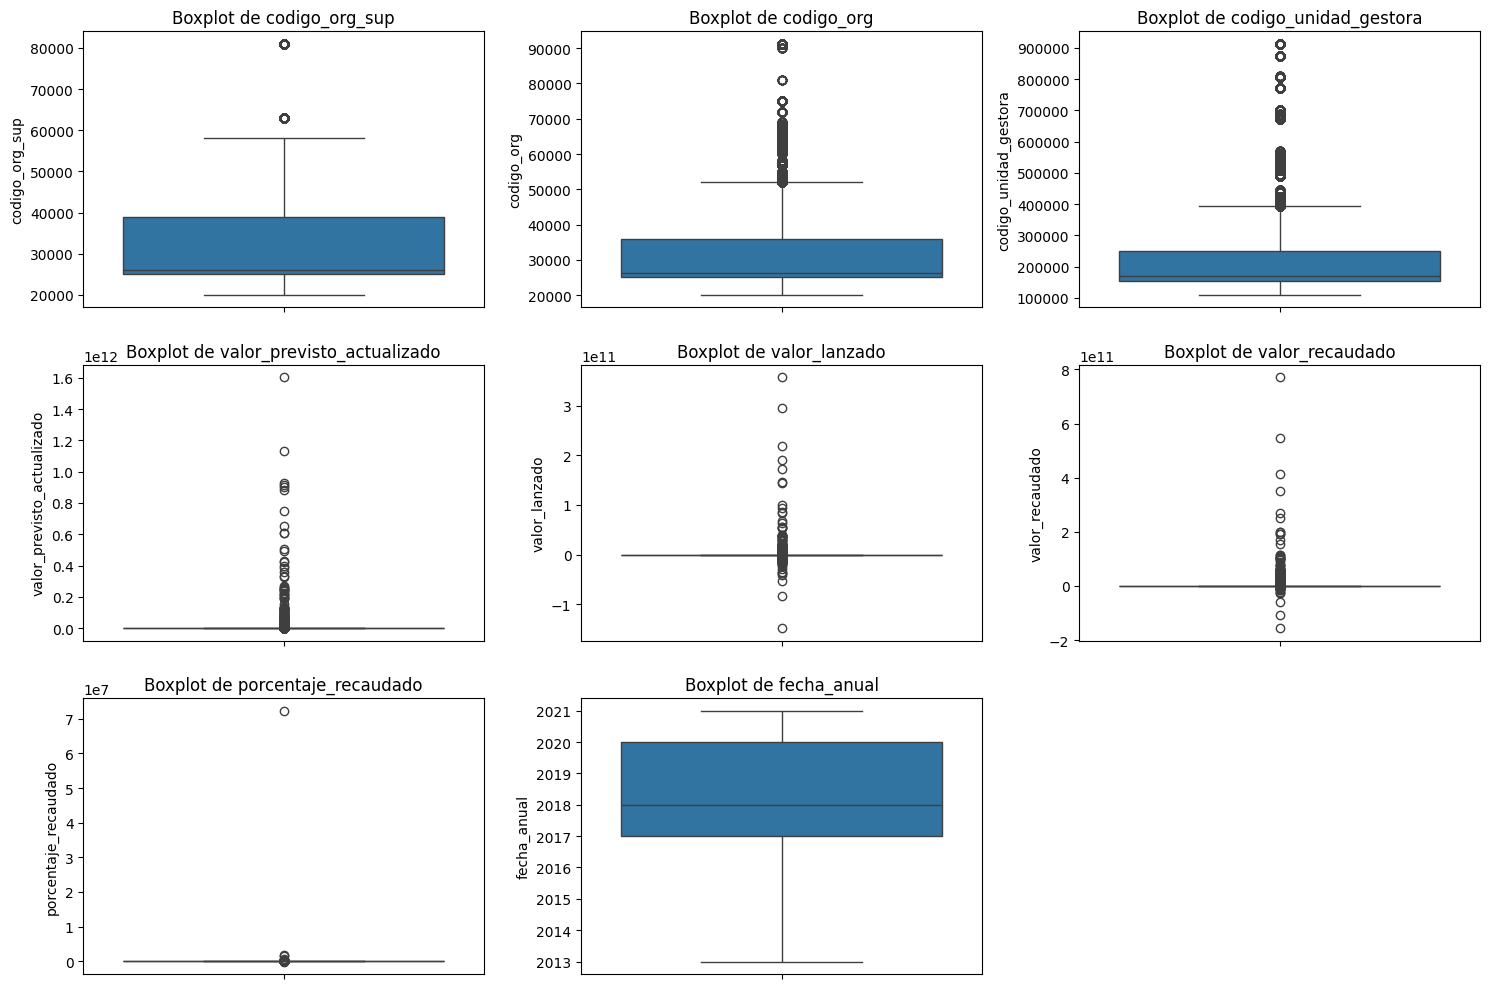

In [42]:
# Creamos un boxplot para variables numéricas
var_num = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(15, 10))

for i, columna in enumerate(var_num, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[columna])
    plt.title(f'Boxplot de {columna}')
    plt.xticks(rotation=45)

plt.tight_layout()

# Calculamos los rangos intercuartílicos y los límites para outliers
for columna in var_num:
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    
    outliers = ((df[columna] < limite_inferior) | (df[columna] > limite_superior)).sum()
    
    print(f"\nColumna: {columna}")
    print(f"Número de outliers: {outliers}")
    print(f"Porcentaje de outliers: {(outliers/len(df)*100):.2f}%")

### Resúmen de los resultados

1. Códigos de identificación:
- codigo_org_sup: 0.49% de outliers 
- codigo_org: 8.33% de outliers 
- codigo_unidad_gestora: 12.52% de outliers 
Lo que esto nos indica es que la variación aumenta conforme bajamos en la jerarquía organizacional.

2. Variables monetarias (Valor):
Alto porcentaje de outliers en valor_recaudado (18.87%) lo cual es llamativo.
Existe una gran diferencia entre los outliers del valor lanzado (0.65%) y el recaudado (18.87%).
El valor previsto mantiene un nivel relativamente bajo de outliers.

## Como parte del EDA se pide los siguientes análisis, que iré usando como guión para el análisis de los datos.
1. **Distribución de Ingresos por Categoría Económica:**

   - Analizar las categorías de ingresos más significativas y su participación en los ingresos totales.

   - Calcular la diferencia promedio entre ingresos previstos y realizados por cada categoría.

2. **Análisis Temporal:**

   - Evaluar las tendencias a lo largo del tiempo, por ejemplo, cómo cambian los ingresos realizados de un mes a otro o de un año a otro.

3. **Identificación de Discrepancias:**

   - Investigar las categorías con mayor diferencia entre lo previsto y lo realizado, identificando patrones en la subejecución o sobre ejecución.


### 1.1 Análisis de distribución de ingresos por categoría económica


Distribución por categoría económica:
                                                valor_recaudado  \
categoria_economica                                               
Receitas Correntes                        12,909,343,128,909.43   
Receitas de Capital                       12,407,136,680,065.79   
Receitas Correntes - intra-orçamentárias     292,651,790,699.89   
Receitas de Capital - intra-orçamentárias     28,250,835,724.33   
Sem informação                                            46.57   

                                           valor_previsto_actualizado  \
categoria_economica                                                     
Receitas Correntes                              13,549,526,943,206.14   
Receitas de Capital                             14,485,753,431,206.59   
Receitas Correntes - intra-orçamentárias           291,485,025,919.00   
Receitas de Capital - intra-orçamentárias           10,808,411,537.00   
Sem informação                                       

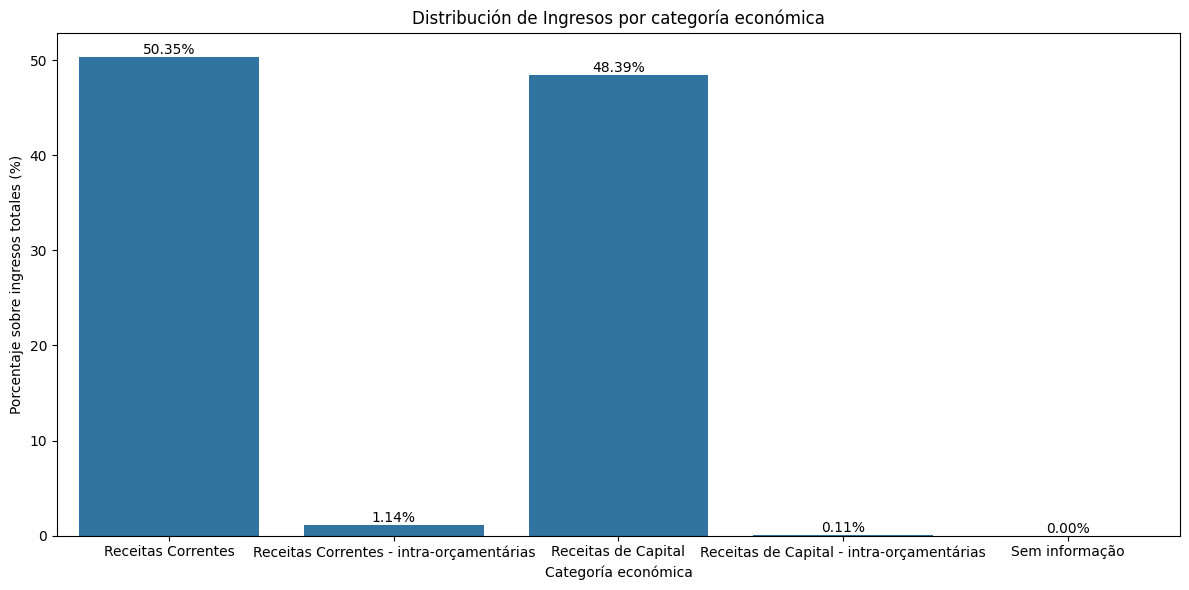

In [29]:
# Agrupamos por categoria_economica y calculamos las sumas
analisis_categorias = df.groupby('categoria_economica').agg({
    'valor_recaudado': 'sum',
    'valor_previsto_actualizado': 'sum'
}).round(2)

# Calculamos el porcentaje que suponen en el total recaudado
total_recaudado = analisis_categorias['valor_recaudado'].sum()
analisis_categorias['porcentaje_participacion'] = (analisis_categorias['valor_recaudado'] / total_recaudado * 100).round(2)

# Para visualizar los resultados, usamos un gráfico de barras al tratarse de 5 categorías
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=analisis_categorias.reset_index(), 
                 x='categoria_economica', 
                 y='porcentaje_participacion')

# Para añadir el porcentaje sobre cada barra
for i, v in enumerate(analisis_categorias['porcentaje_participacion']):
    ax.text(i, v, f'{v:.2f}%', 
            ha='center',
            va='bottom')


plt.title('Distribución de Ingresos por categoría económica')
plt.xlabel('Categoría económica')
plt.ylabel('Porcentaje sobre ingresos totales (%)')

plt.tight_layout()

# También sacamos los valores no mostrados en la tabla 
print("\nDistribución por categoría económica:")
print(analisis_categorias.sort_values('porcentaje_participacion', ascending=False))

## Resumen
Podemos ver que los ingresos se concentran en 2 categorías: "RECEITA DE CAPITAL" (Ingresos de Capital) y "RECEITA CORRENTE" (Ingresos Corrientes), con un 90% de los ingresos.


### 1.2 Análisis de la diferencia entre ingresos previstos y realizados por tipo de categoría económica
En este análisis aquellas categorías que se acercquen al 0 significará que ambos valores están alineados y por tanto se realizó una buena predicción.

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


                                           valor_previsto_actualizado  \
categoria_economica                                                     
Sem informação                                                   0.00   
Receitas de Capital - intra-orçamentárias           10,808,411,537.00   
Receitas Correntes - intra-orçamentárias           291,485,025,919.00   
Receitas Correntes                              13,549,526,943,206.14   
Receitas de Capital                             14,485,753,431,206.59   

                                                valor_recaudado  \
categoria_economica                                               
Sem informação                                            46.57   
Receitas de Capital - intra-orçamentárias     28,250,835,724.33   
Receitas Correntes - intra-orçamentárias     292,651,790,699.89   
Receitas Correntes                        12,909,343,128,909.43   
Receitas de Capital                       12,407,136,680,065.79   

                  

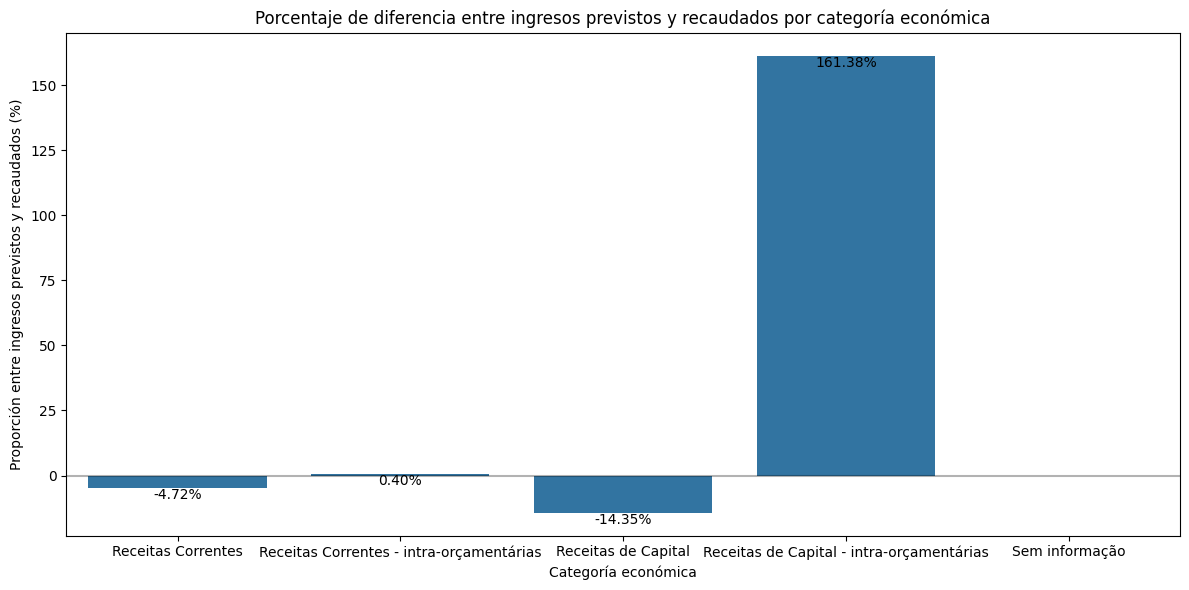

In [28]:
# Calculamos el porcentaje de diferencia
analisis_categorias['porcentaje_diferencia'] = ((analisis_categorias['valor_recaudado'] - analisis_categorias['valor_previsto_actualizado']) / 
                                               analisis_categorias['valor_previsto_actualizado'] * 100).round(2)

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=analisis_categorias.reset_index(), 
                 x='categoria_economica', 
                 y='porcentaje_diferencia')

for i, v in enumerate(analisis_categorias['porcentaje_diferencia']):
    va = 'top'
    ax.text(i, v, f'{v:.2f}%', 
            ha='center',
            va=va)

plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)  # Línea de referencia en 0 ya que hay valores negativos
plt.title('Porcentaje de diferencia entre ingresos previstos y recaudados por categoría económica')
plt.xlabel('Categoría económica')
plt.ylabel('Proporción entre ingresos previstos y recaudados (%)')

plt.tight_layout()

print(analisis_categorias[['valor_previsto_actualizado', 'valor_recaudado', 'porcentaje_diferencia']].sort_values('porcentaje_diferencia', ascending=False))

### Conclusiones generales:

- Hay una clara disparidad entre las operaciones intra-presupuestarias y las regulares
- Las previsiones fueron más precisas en los ingresos corrientes que en los de capital
- Las operaciones intra-presupuestarias de capital mostraron una variación extremadamente alta (161% y -14%)

También será interesante analizar la relación de éste gráfico con el anterior.